In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
%pylab inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = pd.read_csv('heart.csv')

In [47]:
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
data2 = data[['age', 'sex']]
data_s = data2.iloc[0:10]
print(data_s)


   age  sex
0   63    1
1   37    1
2   41    0
3   56    1
4   57    0
5   57    1
6   56    0
7   44    1
8   52    1
9   57    1


In [43]:
data_sort = data_s.sort_values(by=['age'])
print(data_sort)

   age  sex
1   37    1
2   41    0
7   44    1
8   52    1
3   56    1
6   56    0
4   57    0
5   57    1
9   57    1
0   63    1


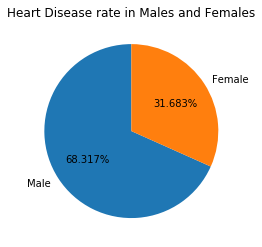

In [60]:
male = len(data[data.sex == 1])
female = len(data[data.sex == 0])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.3f%%', shadow=False, startangle=90)
plt.title("Heart Disease rate in Males and Females")
plt.show()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005877914160>,
      dtype=object)

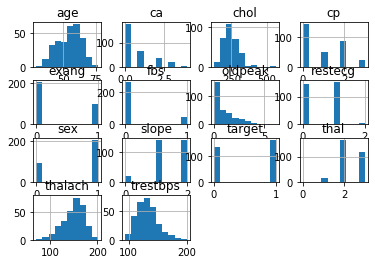

In [61]:
data.hist()

Text(0, 0.5, 'Blood Pressure(mm hg)')

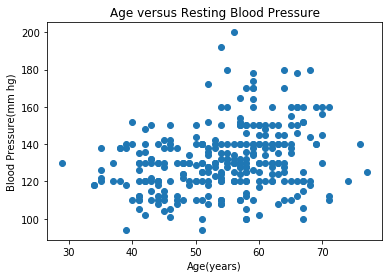

In [65]:
fig, ax = plt.subplots()

ax.scatter(data['age'], data['trestbps'])

ax.set_title('Age versus Resting Blood Pressure')
ax.set_xlabel('Age(years)')
ax.set_ylabel('Blood Pressure(mm hg)')


Text(0, 0.5, 'Cholestrol(mg/dl)')

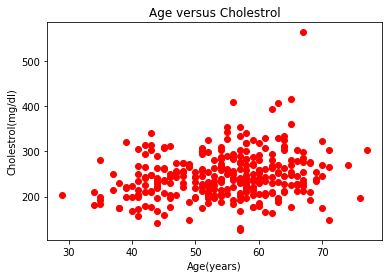

In [9]:
fig, ax = plt.subplots()

ax.scatter([data['age']], [data['chol']],color = 'red')

ax.set_title('Age versus Cholestrol')
ax.set_xlabel('Age(years)')
ax.set_ylabel('Cholestrol(mg/dl)')

Text(0.5, 1.0, 'Count of each Target Class')

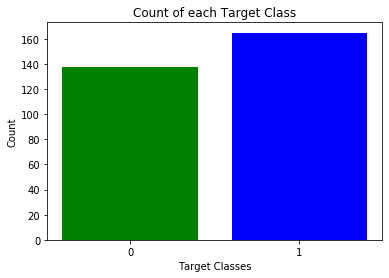

In [83]:
#Count of each target classes
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['blue', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

Text(0, 0.5, 'Maximum heart rate')

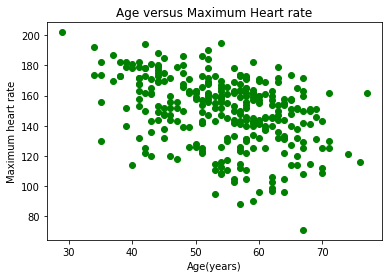

In [85]:
fig, ax = plt.subplots()

ax.scatter(data['age'], data['thalach'],color = 'green')

ax.set_title('Age versus Maximum Heart rate')
ax.set_xlabel('Age(years)')
ax.set_ylabel('Maximum heart rate')

Text(0, 0.5, 'Thalach')

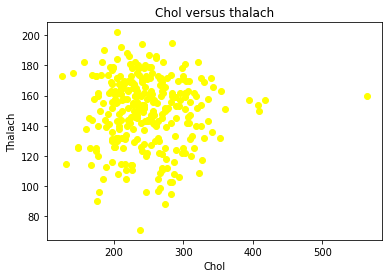

In [88]:
fig, ax = plt.subplots()

ax.scatter(data['chol'], data['thalach'],color = 'yellow')

ax.set_title('Chol versus thalach')
ax.set_xlabel('Chol')
ax.set_ylabel('Thalach')

Text(0, 0.5, 'thalach')

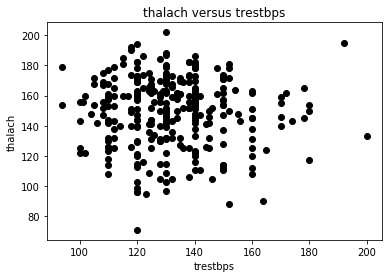

In [15]:
fig, ax = plt.subplots()

ax.scatter(data['trestbps'], data['thalach'],color = 'black')
ax.set_title('thalach versus trestbps')
ax.set_xlabel('trestbps')
ax.set_ylabel('thalach')

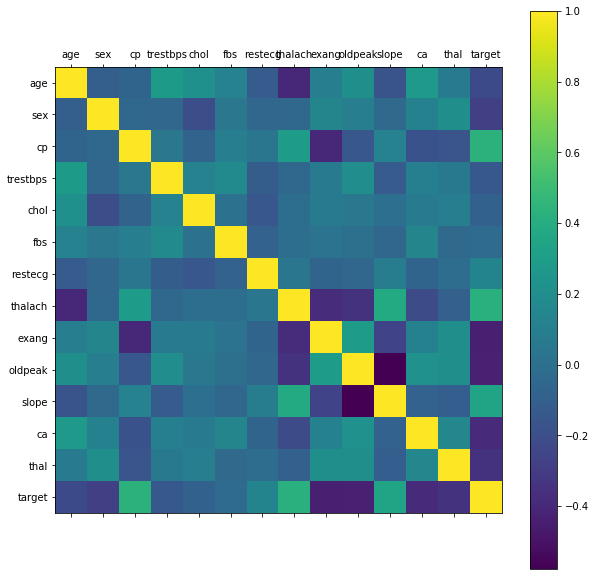

In [94]:
rcParams['figure.figsize'] = 14, 10
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()


In [102]:
y = data['target']
X = data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

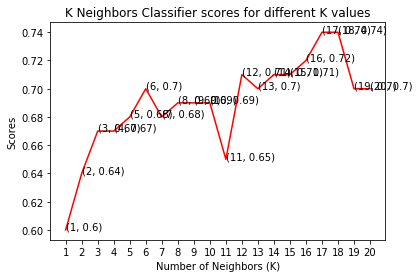

In [103]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

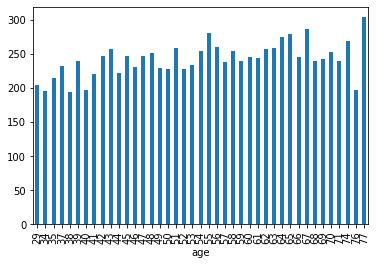

In [9]:
data.groupby("age")['chol'].mean().plot(kind='bar')


In [31]:

a = data.groupby("sex")['chol'].mean().plot(kind='bar')

SyntaxError: invalid syntax (<ipython-input-31-2c95da8bbaa1>, line 2)

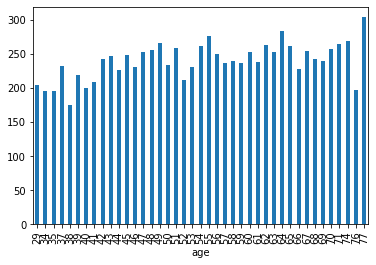

In [32]:
data.groupby("age")['chol'].median().plot(kind='bar')